In [328]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [329]:
df = pd.read_csv("drive/MyDrive/Curso machine learning/Classificação/Heart_failure_tratado.csv",sep=';',encoding='iso-8859-1')

In [330]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [331]:
X = df.iloc[:,0:11]
y = df.iloc[:,-1]



**Codificando Variáveis Categóricas**



In [332]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat
913,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat
914,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat
915,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat


In [333]:
X_cat = pd.DataFrame()
for columns in X.columns:
  if X[columns].dtype == "object":
    X_cat[columns] = LabelEncoder().fit_transform(X[columns])
  else:
    X_cat[columns] = X[columns]

X_cat

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2
1,49,0,2,160.0,180.0,0,1,156,0,1.0,1
2,37,1,1,130.0,283.0,0,2,98,0,0.0,2
3,48,0,0,138.0,214.0,0,1,108,1,1.5,1
4,54,1,2,150.0,195.0,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
912,45,1,3,110.0,264.0,0,1,132,0,1.2,1
913,68,1,0,144.0,193.0,1,1,141,0,3.4,1
914,57,1,0,130.0,131.0,0,1,115,1,1.2,1
915,57,0,1,130.0,236.0,0,0,174,0,0.0,1


**ONE HOT ENCODER**

https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [334]:
X_enc = ColumnTransformer(transformers=[('OneHot',OneHotEncoder(),[1,2,6,8,10])],remainder='passthrough').fit_transform(X_cat)

In [335]:
X_enc

array([[  0. ,   1. ,   0. , ...,   0. , 172. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. , 156. ,   1. ],
       [  0. ,   1. ,   0. , ...,   0. ,  98. ,   0. ],
       ...,
       [  0. ,   1. ,   1. , ...,   0. , 115. ,   1.2],
       [  1. ,   0. ,   0. , ...,   0. , 174. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. , 173. ,   0. ]])

In [336]:
dfX_enc = pd.DataFrame(X_enc)

dfX_enc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0


**Escalonamento dos Atributos**


In [337]:
X_esc = StandardScaler().fit_transform(X_enc)

X_esc

array([[-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.38333943, -0.83150225],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         0.75473573,  0.10625149],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
        -1.52395266, -0.83150225],
       ...,
       [-0.51630861,  0.51630861,  0.92129817, ..., -0.55173333,
        -0.85606123,  0.29380223],
       [ 1.9368261 , -1.9368261 , -1.08542493, ..., -0.55173333,
         1.46191489, -0.83150225],
       [-0.51630861,  0.51630861, -1.08542493, ..., -0.55173333,
         1.42262716, -0.83150225]])

In [338]:
X_esc.shape

(917, 20)

In [339]:
dfX_esc = pd.DataFrame(X_esc)

dfX_esc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.936826,-1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,0.824310,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.936826,-1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,-0.516309,0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,-0.516309,0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,-1.213136,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,1.936826,-1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,0.824310,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [340]:
dfX_esc.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.084798e-16,-1.472226e-16,1.937139e-17,-3.874279e-17,3.874279e-17,6.973702e-17,0.000000,-9.298269e-17,1.549712e-17,-4.261707e-17,4.261707e-17,8.523413e-17,0.000000,-3.874279e-17,1.859654e-16,7.884157e-16,3.014189e-15,-1.549712e-17,-5.114048e-16,-1.859654e-16
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-5.163086e-01,-1.936826e+00,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-2.704405e+00,-2.920572e+00,-2.994023e+00,-5.517333e-01,-3.016886e+00,-3.269662e+00
25%,-5.163086e-01,5.163086e-01,-1.085425e+00,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,-1.226974e+00,-4.907810e-01,-1.213136e+00,-8.243101e-01,-2.716072e-01,-1.001091,-8.698879e-01,-6.900904e-01,-6.971063e-01,-5.745784e-01,-5.517333e-01,-6.596226e-01,-8.315022e-01
50%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,-8.243101e-01,-2.716072e-01,0.998910,-8.698879e-01,5.202558e-02,-1.412398e-01,3.198360e-15,-5.517333e-01,4.755658e-02,-2.688500e-01
75%,-5.163086e-01,5.163086e-01,9.212982e-01,-4.822104e-01,-5.315237e-01,-2.298105e-01,-0.507826,8.150134e-01,-4.907810e-01,8.243101e-01,1.213136e+00,-2.716072e-01,0.998910,1.149573e+00,6.881250e-01,4.146267e-01,4.194568e-01,-5.517333e-01,7.547357e-01,5.751284e-01
max,1.936826e+00,5.163086e-01,9.212982e-01,2.073784e+00,1.881384e+00,4.351412e+00,1.969177,8.150134e-01,2.037569e+00,8.243101e-01,1.213136e+00,3.681787e+00,0.998910,1.149573e+00,2.490407e+00,3.749826e+00,6.721265e+00,1.812470e+00,2.561971e+00,4.982571e+00


**Separando em conjunto de Treino e Teste**

In [341]:
X_train,X_test,y_train,y_test = train_test_split(dfX_esc,y,test_size=0.2,random_state=42)

**Regressão Logistica via SKLEARN**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.decision_function

In [342]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html


https://scikit-learn.org/stable/modules/model_evaluation.html

Matriz de Confusão:


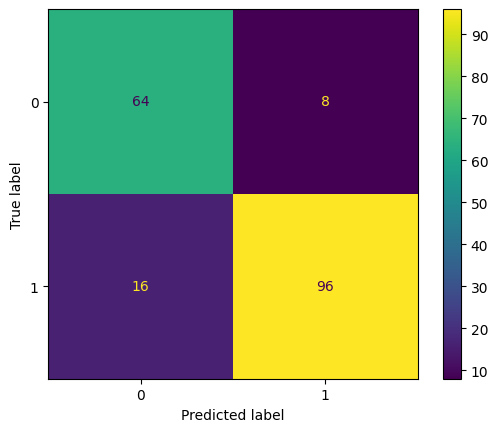

Acurácia:  0.8695652173913043


In [343]:
#FAZER AS METRICAS DE AVALIAÇÕES
#https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

predicao = clf.predict(X_test)
cfM = confusion_matrix(y_test,predicao)

display = ConfusionMatrixDisplay(confusion_matrix=cfM)

print("Matriz de Confusão:")
display.plot()
plt.show()


print("Acurácia: ",end=" ")
print(accuracy_score(predicao,y_test))

**Algoritmo de Regressão Logistica**

In [344]:
dfX_esc.shape

(917, 20)

In [345]:
aux = np.ones(917)
X_alg = pd.DataFrame(aux)

dfX_esc.rename(columns={i: i + 1 for i in dfX_esc.columns}, inplace=True)

X_alg = pd.concat([X_alg,dfX_esc],axis=1)
X_alg

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,...,-0.824310,-0.271607,-1.001091,1.149573,-1.432206,0.414627,0.832075,-0.551733,1.383339,-0.831502
1,1.0,1.936826,-1.936826,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,...,-0.824310,-0.271607,0.998910,-0.869888,-0.478057,1.526360,-1.212261,-0.551733,0.754736,0.106251
2,1.0,-0.516309,0.516309,-1.085425,2.073784,-0.531524,-0.229810,-0.507826,-1.226974,2.037569,...,-0.824310,-0.271607,-1.001091,1.149573,-1.750256,-0.141240,0.719543,-0.551733,-1.523953,-0.831502
3,1.0,1.936826,-1.936826,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,...,1.213136,-0.271607,0.998910,-0.869888,-0.584074,0.303453,-0.574578,-0.551733,-1.131075,0.575128
4,1.0,-0.516309,0.516309,-1.085425,-0.482210,1.881384,-0.229810,-0.507826,0.815013,-0.490781,...,-0.824310,-0.271607,-1.001091,1.149573,0.052026,0.970493,-0.930931,-0.551733,-0.581047,-0.831502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1.0,-0.516309,0.516309,-1.085425,-0.482210,-0.531524,4.351412,-0.507826,0.815013,-0.490781,...,-0.824310,-0.271607,0.998910,-0.869888,-0.902124,-1.252973,0.363191,-0.551733,-0.188170,0.293802
913,1.0,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,...,-0.824310,-0.271607,0.998910,-0.869888,1.536257,0.636973,-0.968441,1.812470,0.165420,2.356860
914,1.0,-0.516309,0.516309,0.921298,-0.482210,-0.531524,-0.229810,-0.507826,0.815013,-0.490781,...,1.213136,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-2.131275,-0.551733,-0.856061,0.293802
915,1.0,1.936826,-1.936826,-1.085425,2.073784,-0.531524,-0.229810,1.969177,-1.226974,-0.490781,...,-0.824310,-0.271607,0.998910,-0.869888,0.370075,-0.141240,-0.161960,-0.551733,1.461915,-0.831502


In [346]:
X_train,X_test,y_train,y_test = train_test_split(X_alg,y,test_size=0.2,random_state=42)

**Definindo a função de Ativação**

In [347]:
def y_predict(p):
  if p >= 0.5:
    return 1

  else:
    return 0

In [348]:
def sigma(z):
  return 1/(1+np.exp(-z))

In [349]:
def u(X,w,j):
  u = np.dot(X.iloc[j,:].values,w.T)

  return u

In [354]:
#Definindo o vetor de ajustes
n = 0.0009
w = np.ones([1,21])
w.T.shape

(21, 1)

**Função de custo**

In [352]:
def custo(X,y,w):
  m = len(y)
  som = 0
  for i in range(m):
    a = -y.iloc[i] * np.log(sigma(u(X,w,i)))

    if 1 - sigma(u(X,w,i)) !=0:
      b = (1 - y.iloc[i]) * np.log(1 - sigma(u(X,w,i)))

    som += (a - b)


  return som/m

**Treinamento**

In [355]:
e = []
while True:
  for j in range(int(len(y_train)/3)):
    grad = ((sigma(u(X_train,w,j)) - y_train.iloc[j])*X_train.iloc[j,:]).values
    w = w - n*grad

  e.append(custo(X_train,y_train,w))
  Custo = custo(X_train,y_train,w)
  print(custo(X_train,y_train,w))

  if Custo < 0.368:
    break


[0.91303378]
[0.83539541]
[0.77262777]
[0.72150483]
[0.67951825]
[0.64472142]
[0.61560698]
[0.59101033]
[0.5700325]
[0.55197855]
[0.53630901]
[0.52260248]
[0.51052722]
[0.49981978]
[0.49026903]
[0.48170423]
[0.47398612]
[0.46700011]
[0.46065121]
[0.45486004]
[0.44955979]
[0.44469386]
[0.44021395]
[0.43607862]
[0.43225206]
[0.42870317]
[0.42540477]
[0.42233303]
[0.41946692]
[0.41678782]
[0.41427918]
[0.41192625]
[0.40971585]
[0.40763614]
[0.40567652]
[0.40382743]
[0.40208026]
[0.40042724]
[0.39886136]
[0.39737628]
[0.39596625]
[0.39462607]
[0.39335102]
[0.39213681]
[0.39097955]
[0.38987568]
[0.38882197]
[0.38781547]
[0.38685348]
[0.38593352]
[0.38505332]
[0.38421079]
[0.38340402]
[0.38263122]
[0.38189076]
[0.38118111]
[0.38050086]
[0.37984869]
[0.37922338]
[0.37862379]
[0.37804883]
[0.3774975]
[0.37696884]
[0.37646197]
[0.37597604]
[0.37551024]
[0.37506382]
[0.37463606]
[0.37422627]
[0.37383379]
[0.37345801]
[0.37309832]
[0.37275415]
[0.37242495]
[0.3721102]
[0.37180939]
[0.37152203]
[0

In [356]:
sigma(u(X_train,w,3))

array([0.00389044])

In [357]:
y_train.iloc[3]

0

In [358]:
m = len(y_test)
y_predicao = np.ones(m)
sum = 0
for i in range(m):
  y_predicao[i] = y_predict(sigma(u(X_test,w,i)))
  if y_predict(sigma(u(X_test,w,i))) == y_test.iloc[i]:
    sum += 1

sum/m

0.8532608695652174

Matriz de Confusão:


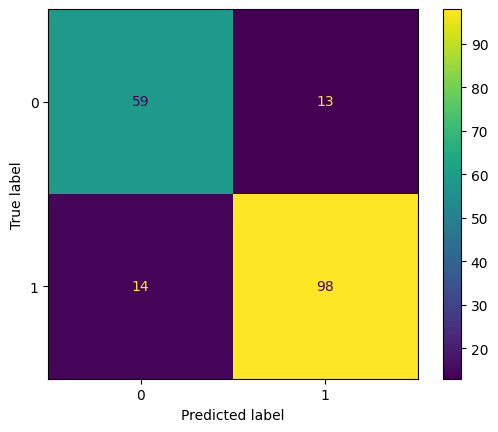

In [359]:
cfM = confusion_matrix(y_test,y_predicao)

display = ConfusionMatrixDisplay(confusion_matrix=cfM)

print("Matriz de Confusão:")
display.plot()
plt.show()

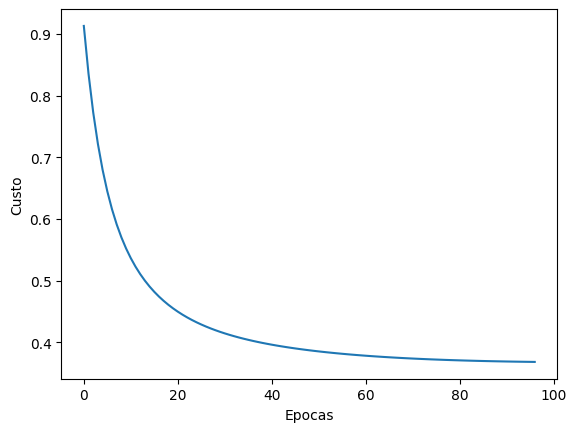

In [360]:
plt.plot(np.arange(len(e)), e)
plt.xlabel("Epocas")
plt.ylabel("Custo")
plt.show()